<a href="https://colab.research.google.com/github/pvsk0226/Stock-Analysis/blob/main/EDA/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stock_Performance_Ranking.csv to Stock_Performance_Ranking.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fulldailyreturnstocks.csv to fulldailyreturnstocks.csv


In [ ]:
!pip install mysql-connector-python sqlalchemy pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pymysql sqlalchemy pandas

In [ ]:
!pip install tabulate

**SQL database connection**

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

import mysql.connector

mydb = mysql.connector.connect(
 host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
 user= "3LBRyXkYRgoP1FS.root",
 password="fwJACxECJe0b7ZlM",
 port = 4000,
)
print(mydb)
mycursor = mydb.cursor(buffered=True)

ModuleNotFoundError: No module named 'mysql'

In [ ]:
mycursor.execute("CREATE DATABASE Stock_Analysis")

Displaying first 10 stocks::

In [ ]:
import pandas as pd
df = pd.read_csv('fulldailyreturnstocks.csv')
df.head(10)

,Ticker,close,date,high,low,month,open,volume,Daily Return,Status
0,ADANIENT,2294.65,2023-10-31 05:30:00,2320.00,2276.00,2023-10,2320.00,1155280,0.000000,Red
1,ADANIENT,2488.60,2023-10-11 05:30:00,2538.00,2482.50,2023-10,2533.90,1627836,0.084523,Red
2,ADANIENT,2261.70,2023-10-27 05:30:00,2275.00,2212.00,2023-10,2222.00,1244293,-0.091176,Green
3,ADANIENT,2429.35,2023-10-16 05:30:00,2464.70,2421.85,2023-10,2454.55,803856,0.074126,Red
4,ADANIENT,2506.35,2023-10-12 05:30:00,2521.75,2490.65,2023-10,2499.90,1804818,0.031696,Green
5,ADANIENT,2454.55,2023-10-13 05:30:00,2495.00,2422.35,2023-10,2488.90,2278682,-0.020668,Red
6,ADANIENT,2402.20,2023-10-19 05:30:00,2414.70,2382.55,2023-10,2400.00,1168822,-0.021328,Green
7,ADANIENT,2498.30,2023-10-10 05:30:00,2517.95,2443.00,2023-10,2443.00,1771910,0.040005,Green
8,ADANIENT,2203.20,2023-10-26 05:30:00,2249.00,2167.05,2023-10,2249.00,2226073,-0.118120,Red
9,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,0.108660,Green


Top 10 stock best performing stocks:

TRENT seems to be the first among top 10 stocks.

+------------+----------+
| stock      |   return |
|------------+----------|
| TRENT      | 223.093  |
| BEL        | 101.76   |
| M&M        |  95.977  |
| BAJAJ-AUTO |  89.0112 |
| BHARTIARTL |  69.599  |
| POWERGRID  |  68.8549 |
| BPCL       |  67.4772 |
| HEROMOTOCO |  58.9767 |
| SUNPHARMA  |  57.2824 |
| HCLTECH    |  53.2574 |
+------------+----------+


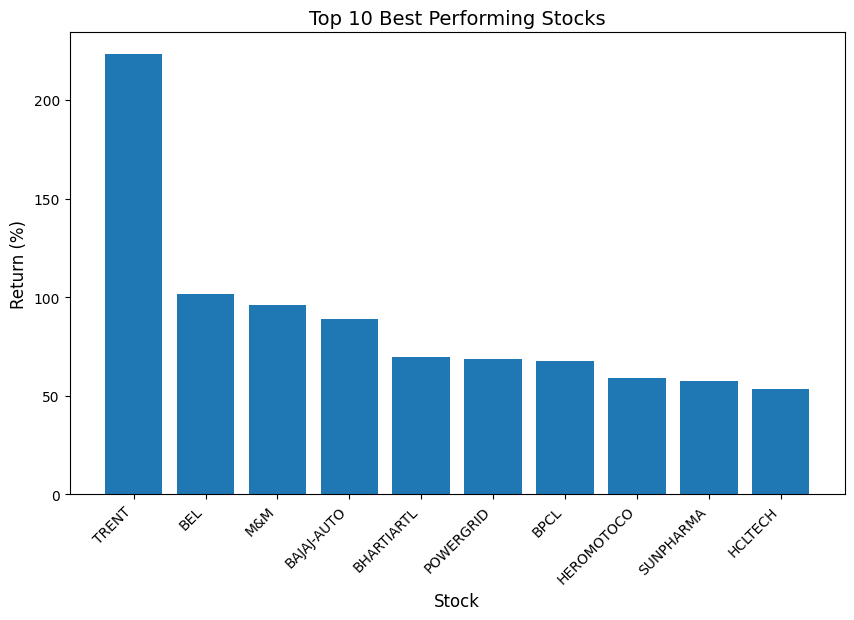

In [ ]:
mycursor.execute("Select stock, return from Stock_Analysis.YearlyReturn order by return DESC LIMIT 10 ")

out=mycursor.fetchall()
from tabulate import tabulate
# print(mycursor.description)
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

import matplotlib.pyplot as plt

# Create a pandas DataFrame from the fetched data
top_10 = pd.DataFrame(out, columns=["Stock", "Return"])

# Fetch the return values for these stocks from the original dataframe
# top_10 = top_10.merge(df, on="Stock") # This line is no longer needed as the data contains both columns

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(top_10["Stock"], top_10["Return"])

plt.title("Top 10 Best Performing Stocks", fontsize=14)
plt.xlabel("Stock", fontsize=12)
plt.ylabel("Return (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

**Top 10 Loss stocks:**
INDUSIND is the seems to be first among Top 10 loss stock

+------------+------------+
| stock      |     return |
|------------+------------|
| INDUSINDBK | -30.4584   |
| ASIANPAINT | -21.935    |
| BAJFINANCE | -16.1109   |
| ADANIENT   |  -6.67086  |
| HINDUNILVR |  -0.957916 |
| NESTLEIND  |   0.707141 |
| KOTAKBANK  |   1.99184  |
| BAJAJFINSV |   2.54957  |
| TITAN      |   3.51819  |
| MARUTI     |   6.92671  |
+------------+------------+


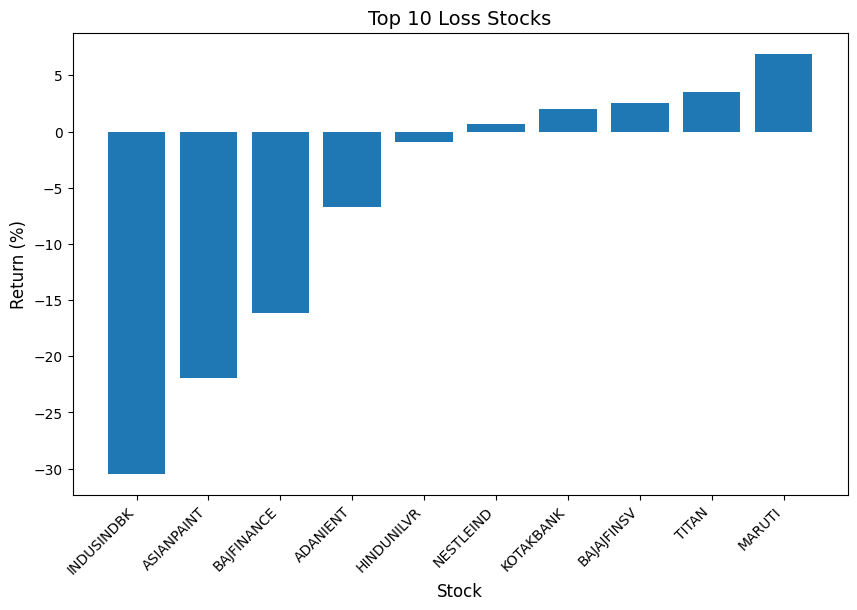

In [ ]:
mycursor.execute("Select stock, return from Stock_Analysis.YearlyReturn order by return ASC LIMIT 10 ")

out=mycursor.fetchall()
from tabulate import tabulate
# print(mycursor.description)
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

import matplotlib.pyplot as plt

# Create a pandas DataFrame from the fetched data
top_10 = pd.DataFrame(out, columns=["Stock", "Return"])

# Fetch the return values for these stocks from the original dataframe
# top_10 = top_10.merge(df, on="Stock") # This line is no longer needed as the data contains both columns

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(top_10["Stock"], top_10["Return"])

plt.title("Top 10 Loss Stocks", fontsize=14)
plt.xlabel("Stock", fontsize=12)
plt.ylabel("Return (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

**Overall number of green vs. red stocks:**



In [ ]:
import pandas as pd
df = (pd.read_csv('fulldailyreturnstocks.csv'))
print(df.head())

     Ticker    close                 date     high      low    month     open  \
0  ADANIENT  2294.65  2023-10-31 05:30:00  2320.00  2276.00  2023-10  2320.00   
1  ADANIENT  2488.60  2023-10-11 05:30:00  2538.00  2482.50  2023-10  2533.90   
2  ADANIENT  2261.70  2023-10-27 05:30:00  2275.00  2212.00  2023-10  2222.00   
3  ADANIENT  2429.35  2023-10-16 05:30:00  2464.70  2421.85  2023-10  2454.55   
4  ADANIENT  2506.35  2023-10-12 05:30:00  2521.75  2490.65  2023-10  2499.90   

    volume  Daily Return Status  
0  1155280      0.000000    Red  
1  1627836      0.084523    Red  
2  1244293     -0.091176  Green  
3   803856      0.074126    Red  
4  1804818      0.031696  Green  


In [ ]:
import pandas as pd
df = (pd.read_csv('fulldailyreturnstocks.csv'))
grouped = df.groupby("Ticker")
overall_status = []
for Ticker, group in grouped:
    first_open = group.iloc[0]["open"]
    last_close = group.iloc[-1]["close"]

    if last_close > first_open:
        overall_status.append({"Ticker": Ticker, "Overall": "Green"})
    else:
        overall_status.append({"Ticker": Ticker, "Overall": "Red"})

# Make a new dataframe of results
summary = pd.DataFrame(overall_status)

# Count how many Green vs Red stocks
counts = summary["Overall"].value_counts()

print(counts)

Overall
Green    44
Red       6
Name: count, dtype: int64


**Average price across all stocks:**

In [ ]:
average_price = df['close'].mean()
print(f"The average price across all stocks is: {average_price:.2f}")

The average price across all stocks is: 2449.42


**Average Volume across all stocks:**

In [ ]:
average_volume = df['volume'].mean()
print(f"The average volume across all stocks is: {average_volume:.2f}")

The average volume across all stocks is: 6833474.65


**1. Volatility Analysis:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Volatility.csv to Volatility.csv


In [ ]:
df = pd.read_csv('Volatility.csv')
print(df.head())

     Ticker                 date  Daily Return  Daily Return_std
0  ADANIENT  2023-10-31 05:30:00      0.000000          0.032494
1  ADANIENT  2023-10-11 05:30:00      0.084523          0.032494
2  ADANIENT  2023-10-27 05:30:00     -0.091176          0.032494
3  ADANIENT  2023-10-16 05:30:00      0.074126          0.032494
4  ADANIENT  2023-10-12 05:30:00      0.031696          0.032494


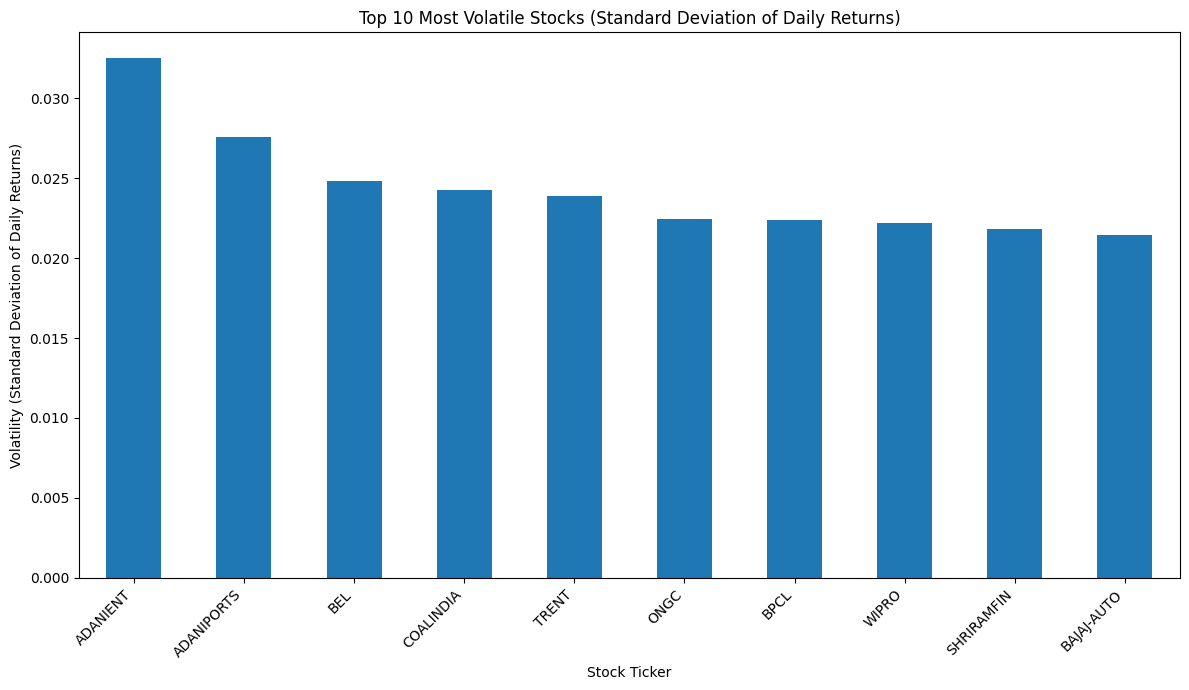

In [ ]:
import matplotlib.pyplot as plt

# Group by Ticker and get the mean of Daily Return_std for each stock
volatility_by_stock = df.groupby('Ticker')['Daily Return_std'].mean().sort_values(ascending=False)

# Select the top 10 most volatile stocks
top_10_volatile_stocks = volatility_by_stock.head(10)

# Create a bar chart
plt.figure(figsize=(12, 7))
top_10_volatile_stocks.plot(kind='bar')
plt.title('Top 10 Most Volatile Stocks (Standard Deviation of Daily Returns)')
plt.xlabel('Stock Ticker')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

High Volatile Stock: **ADANIENT**

The stock price has experienced larger swings (both up and down). The stocks can offer potential for higher returns but also carry higher risk.

In [ ]:
print("Top 10 Most Volatile Stocks:")
print(volatility_by_stock.head(10))

Top 10 Most Volatile Stocks:
Ticker
ADANIENT      0.032494
ADANIPORTS    0.027561
BEL           0.024816
COALINDIA     0.024242
TRENT         0.023867
ONGC          0.022444
BPCL          0.022397
WIPRO         0.022168
SHRIRAMFIN    0.021792
BAJAJ-AUTO    0.021416
Name: Daily Return_std, dtype: float64


**2. Cumulative Return Over Time:**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cumulativereturn.csv to Cumulativereturn.csv


In [ ]:
df = pd.read_csv('Cumulativereturn.csv')
print(df.head())

     Ticker                 date  Daily Return  cumulative_return
0  ADANIENT  2023-10-03 05:30:00     -0.031522          -0.031522
1  ADANIENT  2023-10-04 05:30:00      0.009150          -0.022375
2  ADANIENT  2023-10-05 05:30:00      0.015628          -0.006751
3  ADANIENT  2023-10-06 05:30:00      0.035238           0.028485
4  ADANIENT  2023-10-09 05:30:00      0.108660           0.137176


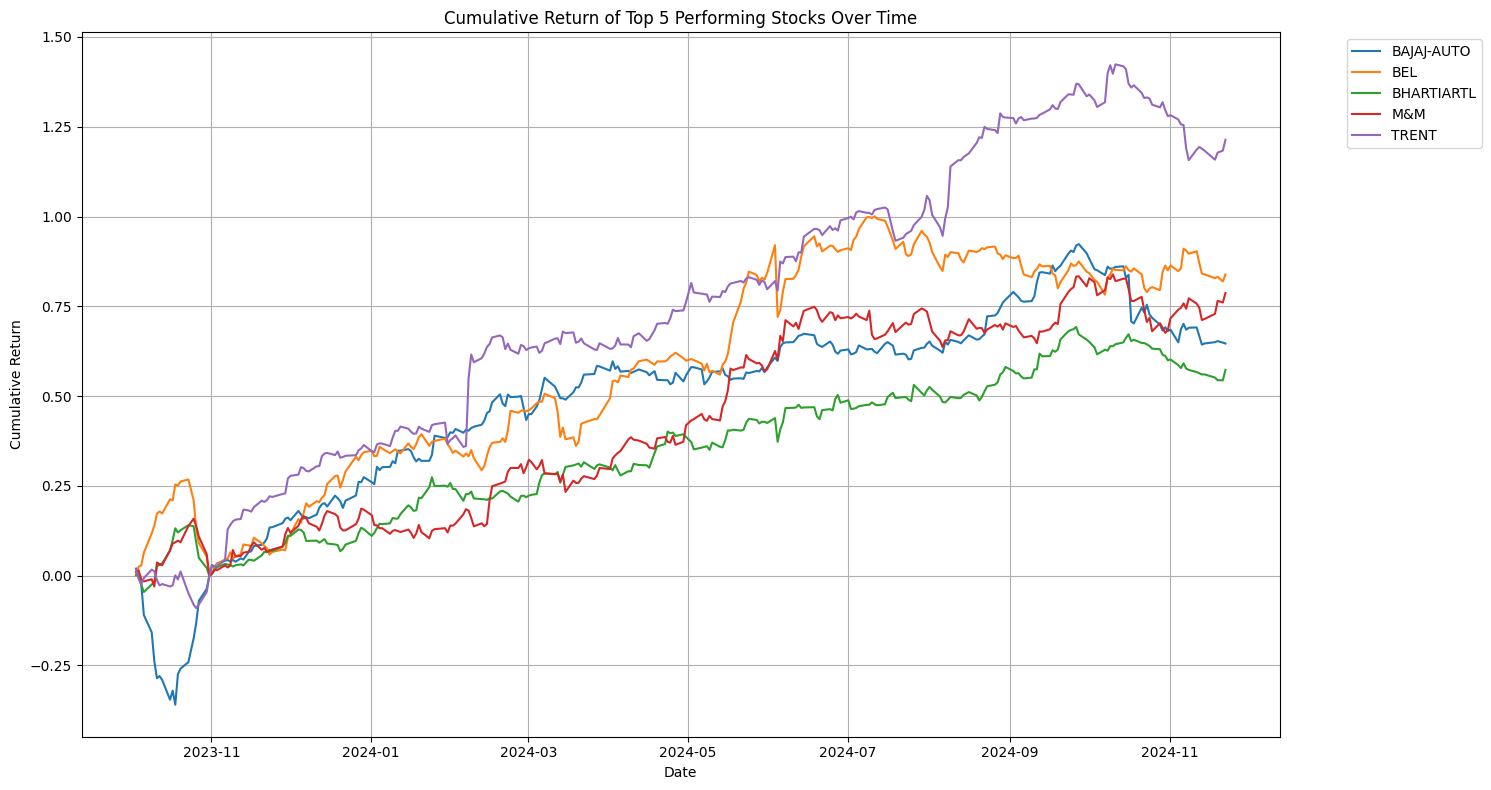

In [ ]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values(by=['Ticker', 'date'])

# Get the last cumulative return for each stock to determine the top 5
last_cumulative_return = df.groupby('Ticker')['cumulative_return'].last()

# Get the top 5 tickers based on the last cumulative return
top_5_tickers = last_cumulative_return.nlargest(5).index.tolist()

# Filter the dataframe to include only the top 5 stocks
top_5_df = df[df['Ticker'].isin(top_5_tickers)]

# Plot cumulative return for the top 5 stocks
plt.figure(figsize=(15, 8))
for ticker in top_5_df['Ticker'].unique():
    stock_data = top_5_df[top_5_df['Ticker'] == ticker]
    plt.plot(stock_data['date'], stock_data['cumulative_return'], label=ticker)

plt.title('Cumulative Return of Top 5 Performing Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Cumulative return represents the total percentage change in the stock's price from the beginning of the period to the end. A higher cumulative return indicates better performance.

From this table, we can understand which stocks have provided the highest overall returns over the year.

TRENT has the highest cumulative return, meaning an investment in TRENT at the beginning of the year would have yielded the highest percentage gain among these top 5 stocks.

In [ ]:
# Get the cumulative returns for the top 5 tickers
top_5_cumulative_returns = last_cumulative_return[top_5_tickers]

# Create a dataframe from the top 5 cumulative returns
top_5_table = pd.DataFrame({'Stock': top_5_cumulative_returns.index, 'Cumulative Return': top_5_cumulative_returns.values})

# Display the table
from tabulate import tabulate
print(tabulate(top_5_table, headers='keys', tablefmt='psql', showindex=False))

+------------+---------------------+
| Stock      |   Cumulative Return |
|------------+---------------------|
| TRENT      |            1.21372  |
| BEL        |            0.838952 |
| M&M        |            0.787068 |
| BAJAJ-AUTO |            0.646446 |
| BHARTIARTL |            0.57305  |
+------------+---------------------+


**3. Sector-wise Performance:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stocks_with_sector.csv to stocks_with_sector.csv


In [ ]:
df = pd.read_csv('stocks_with_sector.csv')
print(df.head())

     Ticker    close                 date     high      low    month     open  \
0  ADANIENT  2294.65  2023-10-31 05:30:00  2320.00  2276.00  2023-10  2320.00   
1  ADANIENT  2488.60  2023-10-11 05:30:00  2538.00  2482.50  2023-10  2533.90   
2  ADANIENT  2261.70  2023-10-27 05:30:00  2275.00  2212.00  2023-10  2222.00   
3  ADANIENT  2429.35  2023-10-16 05:30:00  2464.70  2421.85  2023-10  2454.55   
4  ADANIENT  2506.35  2023-10-12 05:30:00  2521.75  2490.65  2023-10  2499.90   

    volume  Daily Return Status         Sector  
0  1155280      0.000000    Red  MISCELLANEOUS  
1  1627836      0.084523    Red  MISCELLANEOUS  
2  1244293     -0.091176  Green  MISCELLANEOUS  
3   803856      0.074126    Red  MISCELLANEOUS  
4  1804818      0.031696  Green  MISCELLANEOUS  


/tmp/ipython-input-3366494171.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_returns = df.groupby(['Ticker', 'Sector', 'year']).apply(


             Sector  Yearly Return
0         ALUMINIUM       0.191723
1       AUTOMOBILES       0.230655
2           BANKING       0.044498
3            CEMENT       0.166355
4           DEFENCE       0.454970
5            ENERGY       0.150867
6       ENGINEERING       0.110973
7           FINANCE       0.063438
8              FMCG       0.019861
9    FOOD & TOBACCO       0.023475
10        INSURANCE       0.132995
11           MINING       0.141503
12    MISCELLANEOUS       0.133654
13           PAINTS      -0.063774
14  PHARMACEUTICALS       0.150015
15            POWER       0.272926
16        RETAILING       0.418719
17         SOFTWARE       0.198347
18            STEEL       0.121967
19          TELECOM       0.321152
20         TEXTILES       0.175891


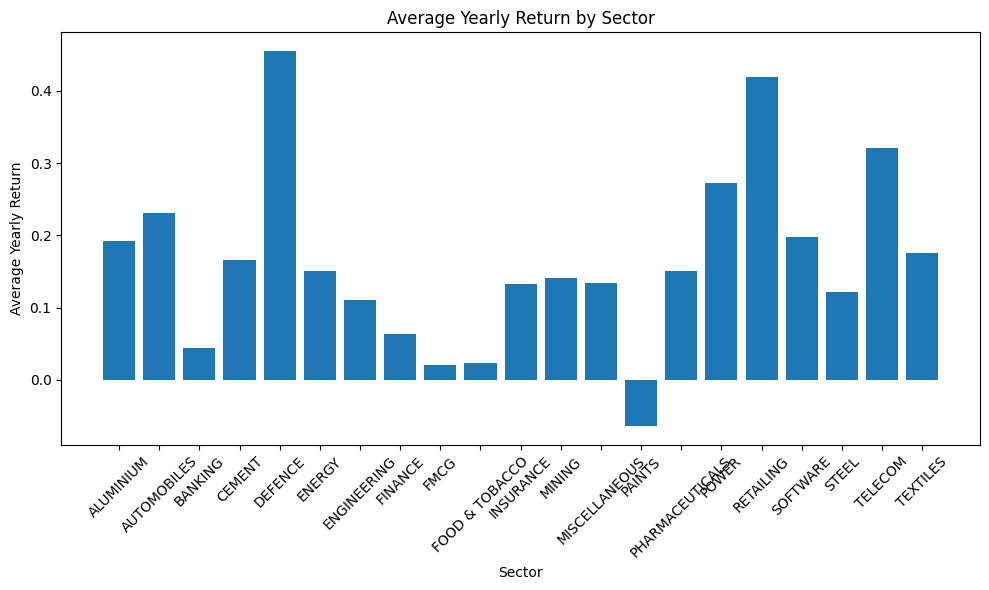

In [ ]:
import pandas as pd

# Load your combined CSV file
df = pd.read_csv("stocks_with_sector.csv")

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate daily return
df['Daily Return'] = (df['close'] - df['open']) / df['open']

# Extract year from date
df['year'] = df['date'].dt.year

# Group by Ticker and year to get first open and last close
yearly_returns = df.groupby(['Ticker', 'Sector', 'year']).apply(
    lambda g: (g.iloc[-1]['close'] - g.iloc[0]['open']) / g.iloc[0]['open']
).reset_index(name='Yearly Return')


sector_avg = yearly_returns.groupby('Sector')['Yearly Return'].mean().reset_index()
print(sector_avg)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(sector_avg['Sector'], sector_avg['Yearly Return'])
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return')
plt.title('Average Yearly Return by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving correlation_matrix.csv to correlation_matrix.csv


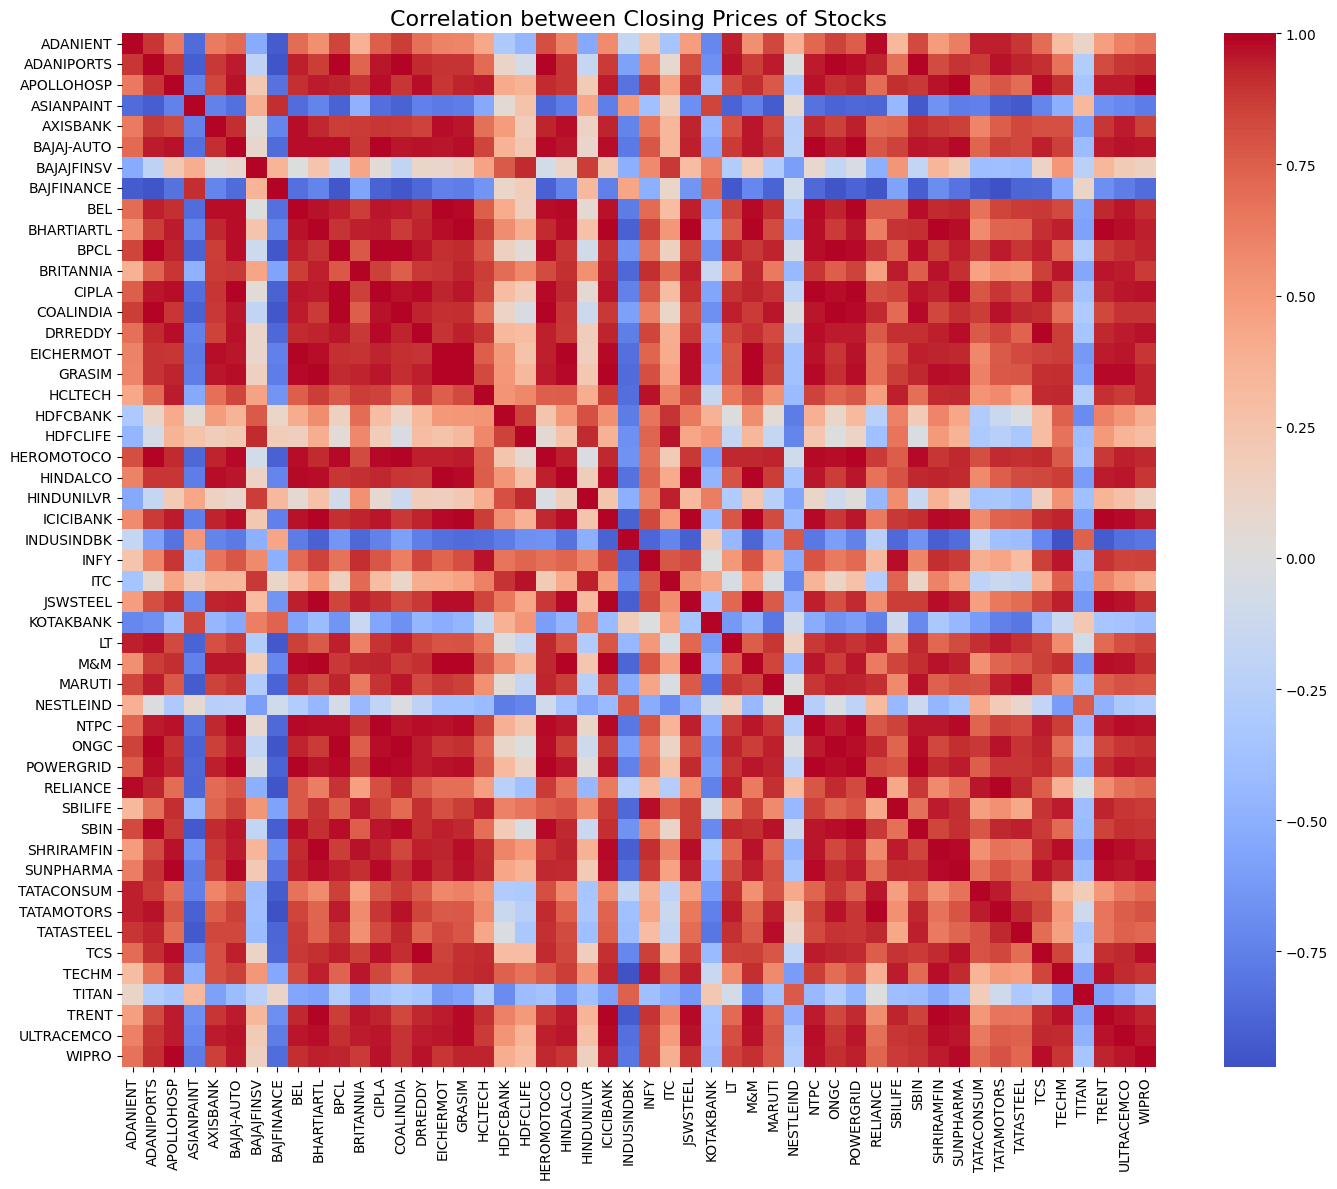

In [ ]:
import pandas as pd

# Read your CSV
df = pd.read_csv("correlation_matrix.csv")

# Calculate the correlation matrix
corr_matrix = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))  # make it large enough to see all labels

sns.heatmap(
    corr_matrix,
    annot=False,       # set True if you want the numbers on the heatmap
    cmap='coolwarm',   # color map (blue to red)
    center=0,          # center at 0 correlation
    square=True        # makes the heatmap square-shaped
)

plt.title("Correlation between Closing Prices of Stocks", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**5. Top 5 Gainers and Losers (Month-wise):**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving monthly_returns.csv to monthly_returns.csv


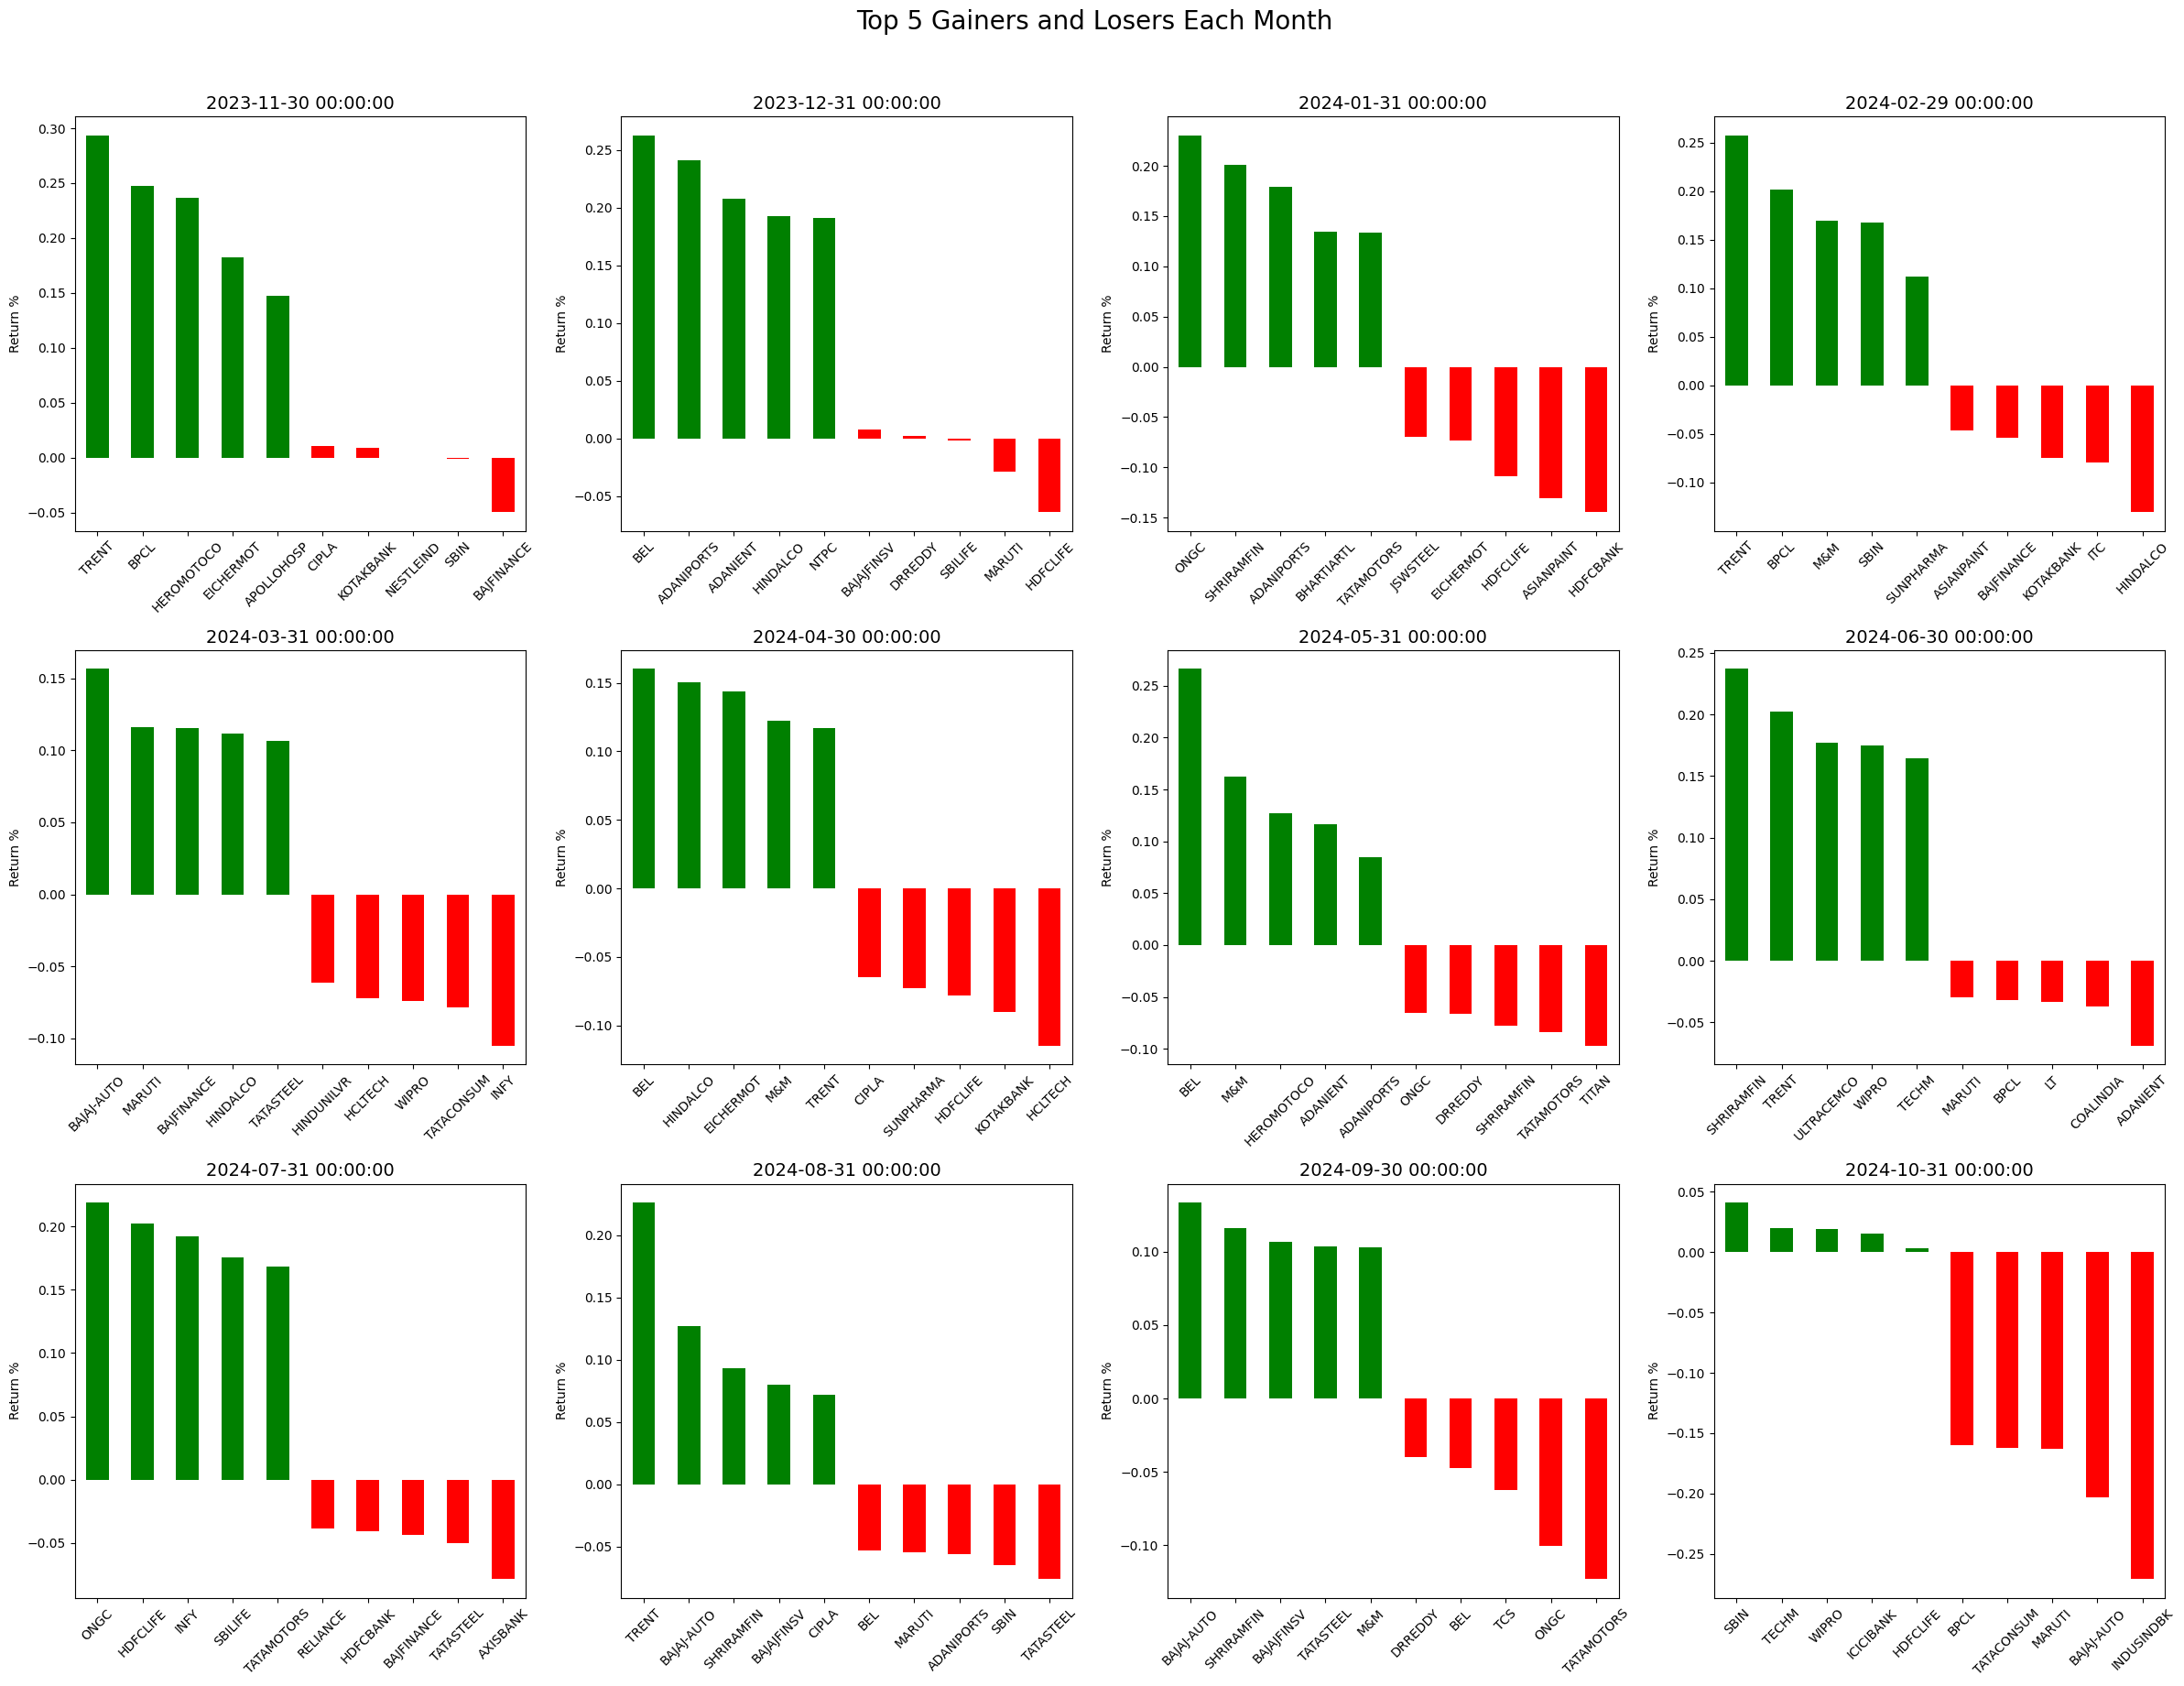

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1. Load   monthly returns CSV
# Each column = stock, each row = month
df = pd.read_csv("monthly_returns.csv")

# make first column month as the index
df.set_index(df.columns[0], inplace=True)

# Convert index to datetime for filtering
df.index = pd.to_datetime(df.index)

# Filter rows between Nov 2023 and Oct 2024
df = df.loc["2023-11":"2024-10"]

# Determine the number of months
num_months = len(df)

# Determine the grid size for subplots
# Calculate number of rows and columns needed
n_cols = 4  # You can adjust the number of columns
n_rows = math.ceil(num_months / n_cols)

# 2. Prepare the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6 * n_rows)) # Adjust figure size based on number of rows
axes = axes.flatten()

# 3. Loop through each month (row)
for i, (month, row) in enumerate(df.iterrows()):
    # Sort the 50 stock returns for this month
    sorted_returns = row.sort_values(ascending=False)

    # Top 5 gainers and bottom 5 losers
    top5 = sorted_returns.head(5)
    bottom5 = sorted_returns.tail(5)

    # Combine into one series (top positive first, bottom negative after)
    combined = pd.concat([top5, bottom5])

    # Choose subplot
    ax = axes[i]

    # Plot bar chart
    colors = ['green'] * 5 + ['red'] * 5
    combined.plot(kind='bar', color=colors, ax=ax)

    ax.set_title(month, fontsize=14)
    ax.set_ylabel('Return %')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(num_months, len(axes)):
    fig.delaxes(axes[j])


# 4. Adjust layout
plt.suptitle("Top 5 Gainers and Losers Each Month", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

The 12 bar charts show the top 5 performing stocks (gainers, in green) and the bottom 5 performing stocks (losers, in red) for each month over the past year.

From these charts, we can understand:

Monthly Performance Trends: We can see how the best and worst performing stocks change from month to month. This highlights the short-term volatility and shifts in market sentiment or sector performance.

Consistent Performers: We can identify no stocks consistently appear in the top 5 gainers or bottom 5 losers across multiple months. This could indicate strong positive or negative momentum.

Magnitude of Returns: The height of the bars shows the percentage return for that month. This allows us to compare the magnitude of gains and losses across different stocks and months.

In summary, these charts provide a quick visual overview of which stocks were the strongest and weakest performers on a monthly basis, helping to identify short-term trends and outliers in the data.

In [ ]:
import pandas as pd

# 1. Read and filter data
df = pd.read_csv("monthly_returns.csv")
df.set_index(df.columns[0], inplace=True)
df.index = pd.to_datetime(df.index)

# Filter for required 12-month window
df = df.loc["2023-11":"2024-10"]

# 2. Collect top 10 tickers for each month
top10_list = []

for month, row in df.iterrows():
    top10_stocks = row.sort_values(ascending=False).head(10).index.tolist()
    top10_list.extend(top10_stocks)

# 3. Count how many times each stock appears in top 10
counts = pd.Series(top10_list).value_counts()

# 4. Select stocks that appear in all 12 months
consistent_top10 = counts[counts == 12].index.tolist()

print("Stocks consistently in top 10 for all 12 months:")
print(consistent_top10)


Stocks consistently in top 10 for all 12 months:
[]


The above code shows that there is no stock that appears consistently in top 10 all 12 months.